<a href="https://colab.research.google.com/github/DeepthiVReddy/Marketing-Campaign/blob/main/Targeted_Marketing_Optimization_Using_Logistic_Regression_and_Gradient_Boosting_A_Lift_and_ROI_Based_Strategy_for_Catalog_Campaigns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv("CuteOutfitMarketing.csv")

# Step 1: Calculate the purchase rate
purchase_rate = data['Purchase'].mean()

# Constants
total_customers = 500000
cost_per_catalog = 2
average_sale_per_purchase = 40
profit_margin = 0.60

# Step 3: Calculations
marketing_cost = total_customers * cost_per_catalog
gross_profit = total_customers * purchase_rate * average_sale_per_purchase * profit_margin
net_profit = gross_profit - marketing_cost
roi = net_profit / marketing_cost

# Step 4: Print the results
print(f"Purchase Rate: {purchase_rate:.2%}")
print(f"Marketing Cost: ${marketing_cost:,.2f}")
print(f"Gross Profit: ${gross_profit:,.2f}")
print(f"Net Profit: ${net_profit:,.2f}")
print(f"ROI: {roi:.2%}")


Purchase Rate: 9.20%
Marketing Cost: $1,000,000.00
Gross Profit: $1,104,000.00
Net Profit: $104,000.00
ROI: 10.40%


In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

# Load the dataset
data = pd.read_csv("CuteOutfitMarketing.csv")

# Build the logistic regression model
formula = "Purchase ~ Age + Gender + OwnHome + Married + Location + Children + History + Income"
logit_model = smf.logit(formula=formula, data=data)

# Fit the model
result = logit_model.fit()

# Print the summary of the logistic regression model
print(result.summary())


         Current function value: 0.156688
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:               Purchase   No. Observations:                  697
Model:                          Logit   Df Residuals:                      686
Method:                           MLE   Df Model:                           10
Date:                Sat, 23 Nov 2024   Pseudo R-squ.:                  0.4998
Time:                        01:58:06   Log-Likelihood:                -109.21
converged:                      False   LL-Null:                       -218.34
Covariance Type:            nonrobust   LLR p-value:                 2.471e-41
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -6.6803      1.184     -5.643      0.000      -9.001      -4.360
Age[T.Old]            0.3243      0.417     

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Q2) Please interpret the coefficient estimate on Location|Far and the coefficient estimate on Income so that a marketing manager can understand them. Which variables are significant?

Location | Far Coefficient: 2.5346 P-Value: 0.000 (statistically significant).

Customers who live "Far" from the retailer are significantly more likely to purchase compared to those who live "Close." Specifically, the log-odds of purchasing increase by 2.5346 for "Far" customers. This means "Far" customers are a valuable target group for marketing efforts, as their likelihood of purchasing is substantially higher.

Income Coefficient: 5.48e-05 (0.0000548). P-Value: 0.000 (statistically significant).

Higher income is positively associated with the likelihood of purchasing. For every unit increase in income, the log-odds of purchasing increase slightly. This suggests that higher-income customers are more likely to purchase and should be considered a key demographic for targeted marketing campaigns.

Significant Variables Variables are considered significant if their p-value is less than 0.05. In this model, the following variables are significant predictors of purchase behavior:

Location | Far (p=0.000): Living far from the retailer increases the likelihood of purchasing. Children (p=0.000): More children reduce the likelihood of purchasing. Income (p=0.000): Higher income increases the likelihood of purchasing.

   decile  total_customers  total_responses  response_rate      lift
9    10.0               70               41      58.571429  6.366460
8     9.0               70               17      24.285714  2.639752
7     8.0               69                6       8.695652  0.945180
6     7.0               70                2       2.857143  0.310559
5     6.0               69                0       0.000000  0.000000
4     5.0               70                0       0.000000  0.000000
3     4.0               70                0       0.000000  0.000000
2     3.0               69                0       0.000000  0.000000
1     2.0               70                0       0.000000  0.000000
0     1.0               70                0       0.000000  0.000000


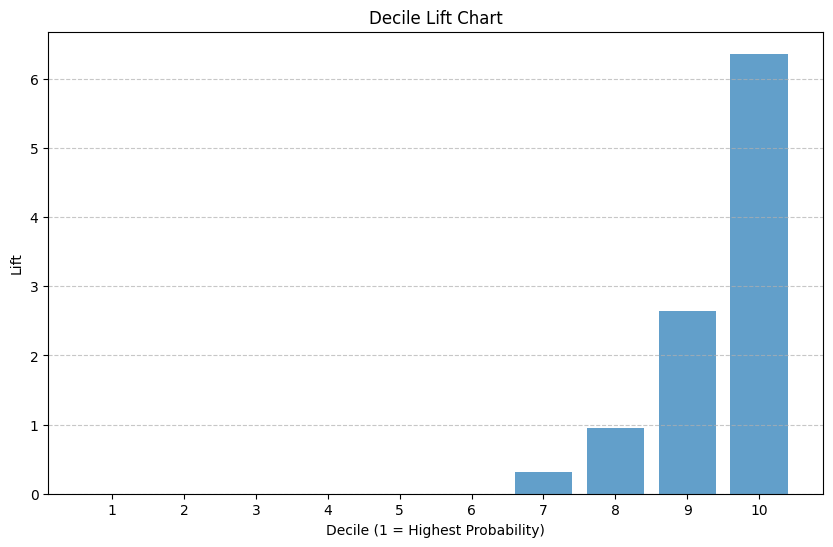

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Predict probabilities using the logistic regression model
data['predicted_prob'] = result.predict(data)

# Step 2: Create deciles based on predicted probabilities
data['decile'] = pd.qcut(data['predicted_prob'], 10, labels=False) + 1

# Step 3: Calculate total responses and response rates for each decile
decile_analysis = data.groupby('decile').agg(
    total_customers=('Purchase', 'count'),
    total_responses=('Purchase', 'sum')
).reset_index()
decile_analysis['response_rate'] = (
    decile_analysis['total_responses'] / decile_analysis['total_customers']
) * 100

# Sort deciles in descending order of probability (highest decile first)
decile_analysis.sort_values(by='decile', ascending=False, inplace=True)

# Step 4: Calculate lift (response rate relative to average response rate)
average_response_rate = data['Purchase'].mean() * 100
decile_analysis['lift'] = decile_analysis['response_rate'] / average_response_rate

# Display the decile analysis
print(decile_analysis)

# Step 5: Create the decile lift chart
plt.figure(figsize=(10, 6))
plt.bar(decile_analysis['decile'], decile_analysis['lift'], alpha=0.7)
plt.xlabel('Decile (1 = Highest Probability)')
plt.ylabel('Lift')
plt.title('Decile Lift Chart')
plt.xticks(decile_analysis['decile'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


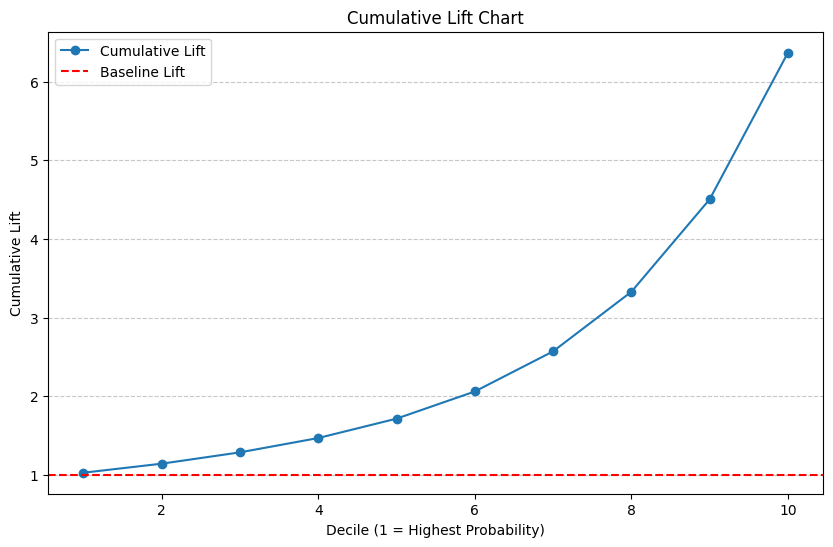

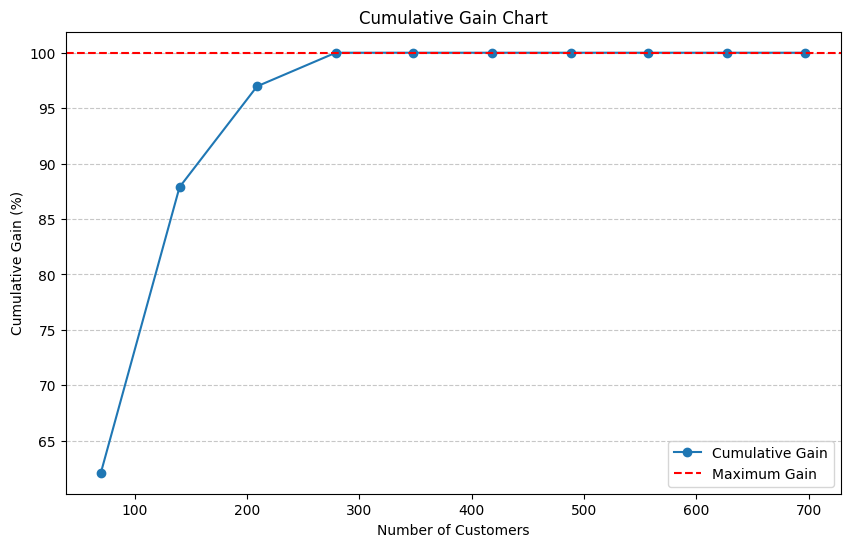

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Calculate cumulative metrics
decile_analysis['cumulative_customers'] = decile_analysis['total_customers'].cumsum()
decile_analysis['cumulative_responses'] = decile_analysis['total_responses'].cumsum()

# Calculate cumulative response rate
decile_analysis['cumulative_response_rate'] = (
    decile_analysis['cumulative_responses'] / decile_analysis['cumulative_customers']
) * 100

# Calculate cumulative lift
decile_analysis['cumulative_lift'] = (
    decile_analysis['cumulative_response_rate'] / average_response_rate
)

# Calculate cumulative gain (percentage of total responses captured)
total_responses = decile_analysis['total_responses'].sum()
decile_analysis['cumulative_gain'] = (
    decile_analysis['cumulative_responses'] / total_responses
) * 100

# Step 2: Create a cumulative lift chart
plt.figure(figsize=(10, 6))
plt.plot(
    decile_analysis['decile'],
    decile_analysis['cumulative_lift'],
    marker='o',
    label='Cumulative Lift'
)
plt.axhline(y=1, color='red', linestyle='--', label='Baseline Lift')
plt.xlabel('Decile (1 = Highest Probability)')
plt.ylabel('Cumulative Lift')
plt.title('Cumulative Lift Chart')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Step 3: Create a cumulative gain chart
plt.figure(figsize=(10, 6))
plt.plot(
    decile_analysis['cumulative_customers'],
    decile_analysis['cumulative_gain'],
    marker='o',
    label='Cumulative Gain'
)
plt.axhline(y=100, color='red', linestyle='--', label='Maximum Gain')
plt.xlabel('Number of Customers')
plt.ylabel('Cumulative Gain (%)')
plt.title('Cumulative Gain Chart')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Q4)Interpretation of the Two Charts for a Marketing Manager

Cumulative Lift Chart
 This chart shows how much better the model is at predicting likely buyers compared to random targeting. A lift of 6 for Decile 10 means that customers in this group are 6 times more likely to purchase compared to an average customer.
Key Insights:
The higher the decile (e.g., Deciles 10 and 9), the higher the likelihood of purchase.
Deciles 6 and below do not add significant value, as their lift approaches 1 (indicating they are no better than random selection).

What You Should Do:
Focus on customers in Deciles 10 and 9, as they are much more likely to buy.
Avoid wasting resources on customers in Deciles 6 and below, as they are unlikely to respond.

Cumulative Gain Chart
 This chart shows how many total responses you can capture by targeting groups of customers ranked by their likelihood to purchase.

Key Insights:
By targeting just the top 20% of customers (Deciles 10 and 9), you can capture over 95% of the total potential responses.
The curve flattens after targeting ~200 customers, meaning adding more customers (from lower deciles) provides little additional benefit.

What You Should Do:
Target fewer customers in the top-performing deciles to achieve most of your campaign’s success.
Skip lower-priority customers (Deciles 6 and below) to save costs without losing significant responses.

In [ ]:
# Step 1: Calculate the breakeven response rate
breakeven_response_rate = 1 / 12

# Step 2: Create the "Mail1" variable
data['Mail1'] = (data['predicted_prob'] >= breakeven_response_rate).astype(int)

# Step 3: Calculate the number of customers targeted
targeted_customers = data['Mail1'].sum()

# Step 4: Estimate the results based on the sample of 1,000 customers
# Constants
total_customers = 500000
cost_per_catalog = 2
average_sale_per_purchase = 40
profit_margin = 0.60

# Scale the results based on the sample to represent the full customer base
scaling_factor = total_customers / len(data)

# Calculate gross profit, marketing cost, net profit, and ROI
gross_profit = (
    targeted_customers * scaling_factor * average_sale_per_purchase * profit_margin
)
marketing_cost = targeted_customers * scaling_factor * cost_per_catalog
net_profit = gross_profit - marketing_cost
roi = net_profit / marketing_cost

# Print the results
print(f"Targeted Customers: {targeted_customers * scaling_factor:,.0f}")
print(f"Marketing Cost: ${marketing_cost:,.2f}")
print(f"Gross Profit: ${gross_profit:,.2f}")
print(f"Net Profit: ${net_profit:,.2f}")
print(f"ROI: {roi:.2%}")


Targeted Customers: 97,500
Marketing Cost: $195,000.00
Gross Profit: $2,340,000.00
Net Profit: $2,145,000.00
ROI: 1100.00%


Q5)Targeted Marketing Strategy

1. Breakeven Response Rate
The breakeven response rate is calculated as:
Breakeven Response Rate=Cost per Mail/Gross Profit per Sale
Cost per Mail = $2.00
•	Gross Profit per Sale = 40×60%=24
Breakeven Response Rate=2/24=0.0833 (8.33%)
Customers with a predicted purchase probability of 8.33% or higher are targeted.

Targeted Customers: 97,500 (from 500,000 total customers based on the representative sample).
2.Marketing Cost(printing and mailing cost):
Marketing Cost=Targeted Customers×Cost per Mail;
Marketing Cost=97,500×2=195,000

3.Gross Profit:
Gross Profit=Total Purchases×Gross Profit per Sale ;
Gross Profit=97,500×24=2,340,000Net Profit:

4.Net Profit=Gross Profit−Marketing ;
 Net Profit=2,340,000−195,000=2,145,000

5.Return on Investment (ROI):
ROI=(Net Profit/Marketing Cost)×100;
ROI=(2,145,000/195,000)×100=1100%


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Load the dataset
data = pd.read_csv("CuteOutfitMarketing.csv")

# Step 2: Define dependent and independent variables
X = data.drop(columns=["Purchase"])
y = data["Purchase"]

# Step 3: Preprocessing for categorical and numeric variables
categorical_features = ["Age", "Gender", "OwnHome", "Married", "Location", "History"]
numeric_features = ["Children", "Income"]

# Preprocessing pipelines
categorical_transformer = OneHotEncoder(handle_unknown="ignore")
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Step 4: Create Gradient Boosted Trees pipeline
gbt_model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        (
            "classifier",
            GradientBoostingClassifier(
                learning_rate=0.1,
                n_estimators=100,
                max_depth=4,
                random_state=1,
            ),
        ),
    ]
)

# Step 5: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Step 6: Train the Gradient Boosted Trees model
gbt_model.fit(X_train, y_train)

# Step 7: Evaluate the model
y_pred = gbt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy:.2%}")


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       181
           1       0.28      0.26      0.27        19

    accuracy                           0.86       200
   macro avg       0.60      0.60      0.60       200
weighted avg       0.86      0.86      0.86       200

Accuracy: 86.50%


Decile Analysis:
   decile  total_customers  total_responses  response_rate      lift
9      10              100               79      79.000000  8.586957
8       9              100                8       8.000000  0.869565
7       8               99                2       2.020202  0.219587
6       7              101                2       1.980198  0.215239
5       6               90                0       0.000000  0.000000
4       5              108                0       0.000000  0.000000
3       4              102                1       0.980392  0.106564
2       3               95                0       0.000000  0.000000
1       2              105                0       0.000000  0.000000
0       1              100                0       0.000000  0.000000


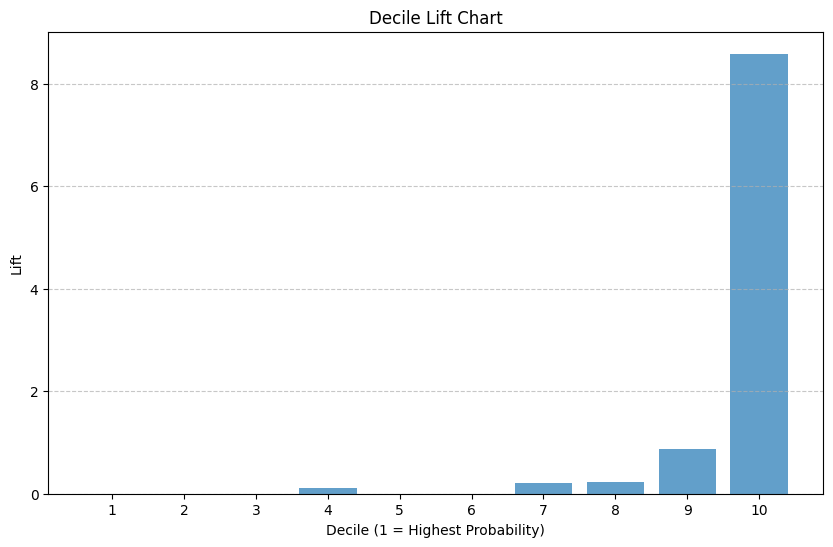

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Get predicted probabilities from the Gradient Boosted Trees model
data['predicted_prob'] = gbt_model.predict_proba(X)[:, 1]

# Step 2: Create deciles based on predicted probabilities
data['decile'] = pd.qcut(data['predicted_prob'], 10, labels=False) + 1

# Step 3: Calculate total responses and response rates for each decile
decile_analysis = data.groupby('decile').agg(
    total_customers=('Purchase', 'count'),
    total_responses=('Purchase', 'sum')
).reset_index()
decile_analysis['response_rate'] = (
    decile_analysis['total_responses'] / decile_analysis['total_customers']
) * 100

# Sort deciles in descending order of probability (highest decile first)
decile_analysis.sort_values(by='decile', ascending=False, inplace=True)

# Step 4: Calculate lift (response rate relative to average response rate)
average_response_rate = data['Purchase'].mean() * 100
decile_analysis['lift'] = decile_analysis['response_rate'] / average_response_rate

# Display the decile analysis
print("Decile Analysis:")
print(decile_analysis)

# Step 5: Create the decile lift chart
plt.figure(figsize=(10, 6))
plt.bar(decile_analysis['decile'], decile_analysis['lift'], alpha=0.7)
plt.xlabel('Decile (1 = Highest Probability)')
plt.ylabel('Lift')
plt.title('Decile Lift Chart')
plt.xticks(decile_analysis['decile'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


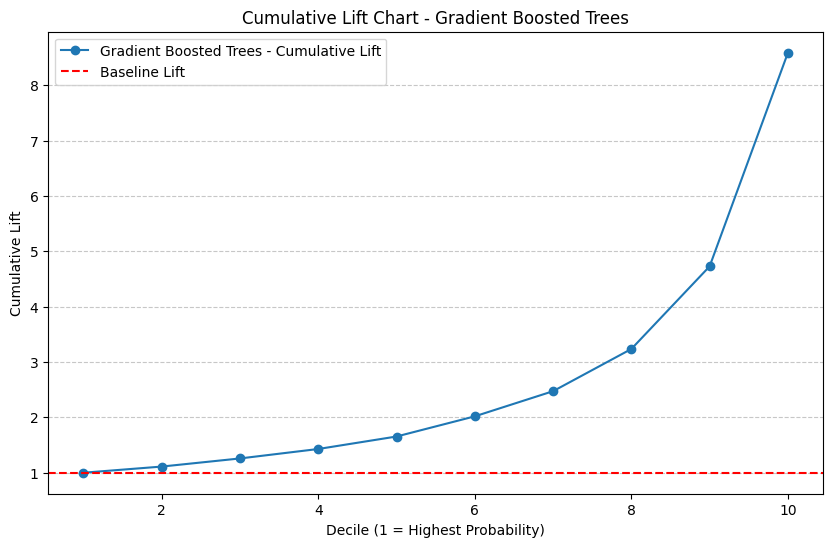

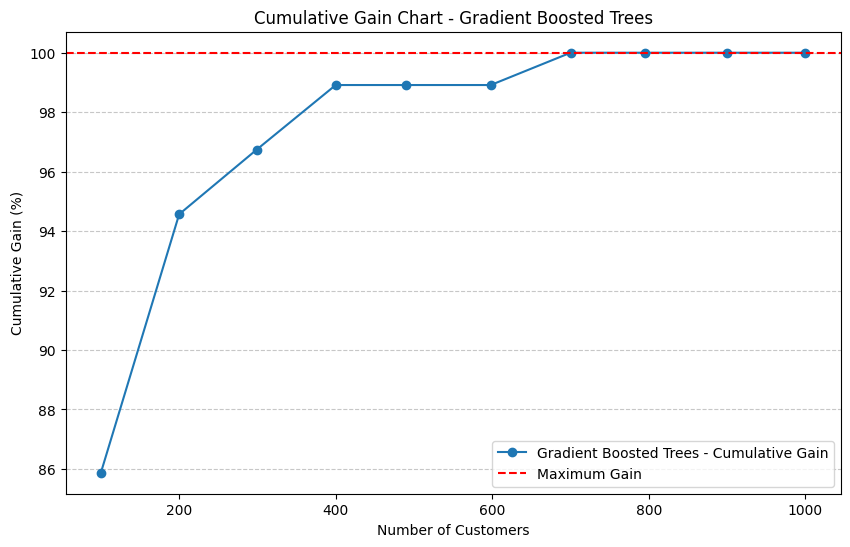

In [ ]:
# Step 1: Calculate cumulative metrics for Gradient Boosted Trees
decile_analysis['cumulative_customers'] = decile_analysis['total_customers'].cumsum()
decile_analysis['cumulative_responses'] = decile_analysis['total_responses'].cumsum()

# Cumulative response rate
decile_analysis['cumulative_response_rate'] = (
    decile_analysis['cumulative_responses'] / decile_analysis['cumulative_customers']
) * 100

# Cumulative lift
decile_analysis['cumulative_lift'] = (
    decile_analysis['cumulative_response_rate'] / average_response_rate
)

# Cumulative gain
total_responses = decile_analysis['total_responses'].sum()
decile_analysis['cumulative_gain'] = (
    decile_analysis['cumulative_responses'] / total_responses
) * 100

# Step 2: Cumulative Lift Chart
plt.figure(figsize=(10, 6))
plt.plot(
    decile_analysis['decile'],
    decile_analysis['cumulative_lift'],
    marker='o',
    label='Gradient Boosted Trees - Cumulative Lift'
)
plt.axhline(y=1, color='red', linestyle='--', label='Baseline Lift')
plt.xlabel('Decile (1 = Highest Probability)')
plt.ylabel('Cumulative Lift')
plt.title('Cumulative Lift Chart - Gradient Boosted Trees')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Step 3: Cumulative Gain Chart
plt.figure(figsize=(10, 6))
plt.plot(
    decile_analysis['cumulative_customers'],
    decile_analysis['cumulative_gain'],
    marker='o',
    label='Gradient Boosted Trees - Cumulative Gain'
)
plt.axhline(y=100, color='red', linestyle='--', label='Maximum Gain')
plt.xlabel('Number of Customers')
plt.ylabel('Cumulative Gain (%)')
plt.title('Cumulative Gain Chart - Gradient Boosted Trees')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Q7)
1. Cumulative Lift Chart
Gradient Boosted Trees :

The lift for the top decile (Decile 10) is above 8, which is significantly better than the lift of 6 in the chart from Q4.
This shows that the Gradient Boosted Trees model is more effective in ranking customers by their likelihood of purchase compared to the earlier model.

The lift curve in Q6 rises more sharply, particularly for the top deciles, indicating a higher level of differentiation between high- and low-probability customers.

Conclusion: The Gradient Boosted Trees model demonstrates a better ability to prioritize high-value customers than the earlier model, as seen in its higher cumulative lift values.

2. Cumulative Gain Chart
Gradient Boosted Trees:

The gain chart for Q6 captures over 95% of the total responses by targeting approximately the top 200 customers, similar to Q4.
However, the Gradient Boosted Trees model provides slightly better gains for the top deciles, with the curve flattening slightly later than in Q4, showing that it retains higher performance as more customers are targeted.

Comparison with Q4:

Both models effectively identify the top ~200 customers to capture the majority of responses.
The Gradient Boosted Trees model marginally outperforms the earlier model in the early deciles, reflecting a better ability to focus on high-probability customers.

Conclusion:
The Gradient Boosted Trees model is more effective at identifying high-value customers, making it a superior choice for targeted marketing campaigns.
By adopting this model, the marketing strategy can achieve better results with similar or reduced costs compared to the earlier approach.


In [ ]:
# Step 1: Define the breakeven response rate
breakeven_response_rate = 1 / 12

# Step 2: Create the "Mail2" variable
data['Mail2'] = (data['predicted_prob'] >= breakeven_response_rate).astype(int)

# Step 3: Calculate the number of customers targeted
targeted_customers = data['Mail2'].sum()

# Step 4: Estimate results based on the sample of 1,000 customers
# Constants
total_customers = 500000
cost_per_catalog = 2
average_sale_per_purchase = 40
profit_margin = 0.60

# Scale the results based on the sample to represent the full customer base
scaling_factor = total_customers / len(data)

# Calculate gross profit, marketing cost, net profit, and ROI
gross_profit = (
    targeted_customers * scaling_factor * average_sale_per_purchase * profit_margin
)
marketing_cost = targeted_customers * scaling_factor * cost_per_catalog
net_profit = gross_profit - marketing_cost
roi = net_profit / marketing_cost

# Step 5: Print results
print(f"Targeted Customers: {targeted_customers * scaling_factor:,.0f}")
print(f"Marketing Cost: ${marketing_cost:,.2f}")
print(f"Gross Profit: ${gross_profit:,.2f}")
print(f"Net Profit: ${net_profit:,.2f}")
print(f"ROI: {roi:.2%}")


Targeted Customers: 81,000
Marketing Cost: $162,000.00
Gross Profit: $1,944,000.00
Net Profit: $1,782,000.00
ROI: 1100.00%


Q8)Targeted Marketing Strategy

Targeted Customers: 81,000 (out of 500,000 customers, scaled from the representative sample).

Marketing Cost:
Marketing Cost=Targeted Customers×Cost per Mail
Marketing Cost=81,000×2=162,000

Gross Profit:
Gross Profit=Total Purchases×Gross Profit per Sale
Gross Profit=81,000×24=1,944,000

Net Profit:
Net Profit=Gross Profit−Marketing Cost
Net Profit=1,944,000−162,000=1,782,000

Return on Investment (ROI):
ROI=(Net Profit/Marketing Cost)×100
ROI= (162,000/1,782,000)×100=1100%

By targeting 81,000 high-probability customers (16.2% of the total) using the Gradient Boosted Trees model, CuteOutfit can achieve a gross profit of $1,944,000 and a net profit of $1,782,000 at a marketing cost of just $162,000. This targeted strategy ensures a high ROI of 1100%, meaning every $1 spent generates $11 in profit. By focusing on these customers, the company minimizes costs while maximizing profits, making this a highly efficient and profitable marketing approach.
